https://github.com/karim-sharkawy/Notions-of-Positivity-and-Complexity-in-Quantum-Information-Theory

**Always run the first block underneath**

In [ ]:
import numpy as np

extendable_class = np.load("/content/extendableMappings.npy")
nonextendable_class = np.load("/content/nonExtendableMappings.npy")
goodclassifier_class = np.load("/content/2900trueGoodClassifiers.npy")
#farthestBs_class = np.load("/content/farthestBsMORE.npy")

# Create a new list to store reshaped matrices
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)
goodclassifier_class = reshaped_goodclassifier_class

print("Number of extendables: ", len(extendable_class))
print("Number of nonextendables: ", len(nonextendable_class))
print("Number of good classifiers: ", len(goodclassifier_class))

Number of extendables:  77462
Number of nonextendables:  22538
Number of good classifiers:  2904


In [ ]:
import numpy as np

# Convert matrices to a list of tuples for hashability
matrices_list = [tuple(row) for row in nonextendable_class.reshape(nonextendable_class.shape[0], -1)]

# Find unique tuples
unique_tuples = np.unique(matrices_list, axis=0)

# Check if there are duplicates
if len(unique_tuples) < len(nonextendable_class):
    print(f"{len(nonextendable_class) - len(unique_tuples)} Duplicates found. ")
else:
    print("No duplicates found.")

140 Duplicates found. 


In [ ]:
# Convert matrices to a list of tuples for hashability
matrices_list = [tuple(row) for row in nonextendable_class.reshape(nonextendable_class.shape[0], -1)]

# Find unique tuples
unique_tuples = np.unique(matrices_list, axis=0)

# Convert unique tuples back to matrices
unique_matrices = np.array([np.array(tuple_matrix).reshape(nonextendable_class.shape[1:]) for tuple_matrix in unique_tuples])

# Save the unique matrices to a new .npy file
output_file_path = 'nonextendable_class_no_duplicates.npy'
np.save(output_file_path, unique_matrices)

print(f"Unique matrices saved to '{output_file_path}'.")

Unique matrices saved to 'nonextendable_class_no_duplicates.npy'.


In [ ]:
nonextendable_class_no_duplicates = np.load("/content/nonextendable_class_no_duplicates.npy")

# **Conjecture test**

In [ ]:
import numpy as np
from scipy.optimize import linprog

def tau(a, b, c, d):
    return np.array([(a+d)/2, (b+c)/2, (a+c)/2, (b+d)/2]) # ~45-50%

def psi(a, b, c, d):
  return np.array([(a+b)/2, (b+a)/2, (d+c)/2, (c+d)/2]) # ~92.5-97%

def bruh1(a, b, c, d):
  return np.array([(a+d), (b+d), (b+c), (b+d)]) # ~50.5%
def bruh2(a, b, c, d):
  return np.array([(a+c), (b+c), (a+c), (a+d)]) # ~51%
def bruh3(a, b, c, d):
  return np.array([(a+c), (b+c), (b+c), (b+d)]) # ~50%
def bruh4(a, b, c, d):
  return np.array([(a+d), (b+d), (a+c), (a+d)]) # ~50% alone, all 4 together ~87.5%

def idk(a, b, c, d):
  return np.array([(a+d), (b+d), (d+c), (c+d)]) # ~65%

def idc(a, b, c, d):
  return np.array([(a+d+c+b), (a+b+d+c), (a+b+d+c), (a+b+d+c)]) # ~92.5%

def sigma(a, b, c, d):
  return np.array([a + np.max(-a,-b),b + np.max(-a,-b), c + np.min(c,d), d + np.min(c,d)])

def tau_inverse(a, b, c, d):
    return np.array([2*c - b, 2*d - a, 2*b - c, 2*a - d])

# List to store transformed matrices
tauNonextends = []
failedtests = []

# Apply tau to each row in nonextendable_clss and append to tauNonextends
for row in nonextendable_class[0:2000]:
    transformed_row = psi(*row)
    tauNonextends.append(transformed_row)

# Convert tauNonextends to a numpy array if needed
tauNonextends = np.array(tauNonextends)

newlyExtendable = 0
stillnonExtendable = 0

for matrix in tauNonextends:
  mat = [1, 1, 1, 1]
  for_A_ub = [[1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1],
            [-1,0,0,0],
            [0,-1,0,0],
            [0,0,-1,0],
            [0,0,0,-1],]
  solve_for = [[min(matrix[0][2], matrix[0][3])],
             [min(matrix[1][2], matrix[1][3])],
             [min(matrix[2][2], matrix[2][3])],
             [min(matrix[3][2], matrix[3][3])],
             [-max(-matrix[0][0], -matrix[0][1])],
             [-max(-matrix[1][0], -matrix[1][1])],
             [-max(-matrix[2][0], -matrix[2][1])],
             [-max(-matrix[3][0], -matrix[3][1])]]
  for_A_eq = [[1,1,-1,-1]]
  for_b_eq = [0]

  result = linprog(c=mat, A_ub = for_A_ub, b_ub = solve_for, A_eq = for_A_eq, b_eq = for_b_eq, bounds = None)

  if (result.success):
    newlyExtendable += 1
  else:
    stillnonExtendable += 1
    failedtests.append(matrix)

failedtests = np.array(failedtests)

print("newly extendable", newlyExtendable)
print("still not extendable", stillnonExtendable)
#print(failedtests)

newly extendable 1911
still not extendable 89


In [ ]:
import numpy as np
from scipy.optimize import linprog

#turning nonextendables with tau
# Example list of ndarrays (each representing a row)
# Define the function tau

def tau(a, b, c, d):
    return np.array([(a+d)/2, (b+c)/2, (a+c)/2, (b+d)/2])

def tau_inverse(a, b, c, d):
    return np.array([2*c - b, 2*d - a, 2*b - c, 2*a - d])

# List to store transformed matrices
tauNonextends = []

# Apply tau to each row in extendable_class and append to tauNonextends
for row in extendable_class:
    transformed_row = tau(*row)
    tauNonextends.append(transformed_row)

# Convert tauNonextends to a numpy array if needed
tauNonextends = np.array(tauNonextends)

newlynonExtendable = 0
stillextends = 0

for matrix in tauNonextends:
  mat = [1, 1, 1, 1]
  for_A_ub = [[1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1],
            [-1,0,0,0],
            [0,-1,0,0],
            [0,0,-1,0],
            [0,0,0,-1],]
  solve_for = [[min(matrix[0][2], matrix[0][3])],
             [min(matrix[1][2], matrix[1][3])],
             [min(matrix[2][2], matrix[2][3])],
             [min(matrix[3][2], matrix[3][3])],
             [-max(-matrix[0][0], -matrix[0][1])],
             [-max(-matrix[1][0], -matrix[1][1])],
             [-max(-matrix[2][0], -matrix[2][1])],
             [-max(-matrix[3][0], -matrix[3][1])]]
  for_A_eq = [[1,1,-1,-1]]
  for_b_eq = [0]

  result = linprog(c=mat, A_ub = for_A_ub, b_ub = solve_for, A_eq = for_A_eq, b_eq = for_b_eq, bounds = None)
  if (result.success):
    stillextends += 1
  else:
    newlynonExtendable += 1

print("still extend", stillextends)
print("now don't extend!",newlynonExtendable)

still extend 77462
now don't extend! 0


# **Classifier Verification**

The condition below satisfies ~55% of classifiers

In [ ]:
passedfirst = 0
failedfirst = []

for matrix_index in range(len(goodclassifier_class)):  # Iterate over matrices
    matrix = goodclassifier_class[matrix_index]  # Get the matrix at the current index
    passes_all_conditions = True  # Flag to track if the matrix passes all conditions

    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]

        if not (row[0] + row[1] + row[2] + row[3] <= 0): #condition
            #print(matrix, "Fails condition in row:", i)
            passes_all_conditions = False
            break

    if passes_all_conditions:
        #print(matrix, "Passes all conditions")
        passedfirst += 1

    if not passes_all_conditions:
       failedfirst.append(matrix)

print(f"{passedfirst} Classifiers passed the condition")
print(f"{len(failedfirst)} Classifiers failed the condition")

failedfirst = np.array(failedfirst)

1593 Classifiers passed the condition
1311 Classifiers failed the condition


The other 45% (1311 classifiers) are satisfied with the condition below

In [ ]:
passedtest = 0
failedtest = 0

for matrix in failedfirst:
    all_rows_satisfied = True

    for row in matrix:
        if not (row[0] + row[1] + row[2] + row[3] != 0): #condition
            all_rows_satisfied = False
            break

    if all_rows_satisfied:
        passedtest += 1
    else:
        failedtest += 1

print(passedtest, failedtest)

1311 0


# **Plotting**

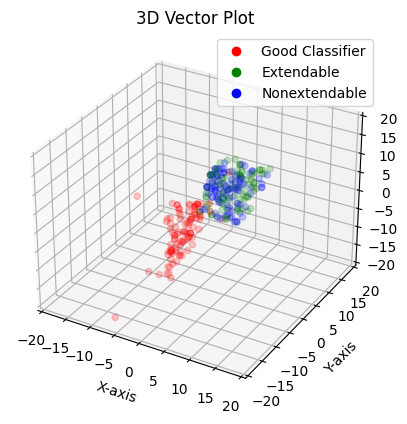

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extendable', "Nonextendable", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot classifiers
for i in range(25):
    soa0 = goodclassifier_class[i]
    soa0 = soa0[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa0[:, 0], soa0[:, 1], soa0[:, 2], color=colors[0], alpha=0.2)

# Plot extendable mappings
for i in range(25):
    soa1 = extendable_class[i]
    soa1 = soa1[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa1[:, 0], soa1[:, 1], soa1[:, 2], color=colors[1], alpha=0.2)

# Plot nonextendable mappings
for i in range(25):
    soa2 = nonextendable_class[i]
    soa2 = soa2[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa2[:, 0], soa2[:, 1], soa2[:, 2], color=colors[2], alpha=0.2)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Plot')

scatter1_proxy = plt.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
scatter2_proxy = plt.Line2D([0],[0], linestyle="none", c='g', marker = 'o')
scatter3_proxy = plt.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
ax.legend([scatter1_proxy, scatter2_proxy, scatter3_proxy], labels)

# Show the plot
plt.show()

# **Properties and finding algebraic differences**

In [ ]:
import numpy as np
from numpy.linalg import matrix_rank
from scipy.linalg import lu, inv

def matrix_properties(matrix):
    # Rank of the matrix
    rank = matrix_rank(matrix)

    # Determinant of the matrix
    determinant = np.linalg.det(matrix)

    # eigenvalues and eigenvectors of the product matrix.T @ matrix
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Null space (kernel) of the matrix
    _, s, V = np.linalg.svd(matrix)
    tolerance = max(matrix.shape) * np.spacing(np.max(s))
    null_space = V.T[:, s < tolerance]

    # Column space (range) of the matrix
    Q, _ = np.linalg.qr(matrix)
    column_space = Q[:, :rank]  # Use `rank` from matrix_rank

    P, L, U = lu(matrix) # Compute LU decomposition
    L_inv = inv(L)
    RREF = np.dot(L_inv, np.dot(P, matrix))

    return {
        'rank': rank,
        'determinant': determinant,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors,
        'null_space': null_space,
        'column_space': column_space,
        'rref': RREF
    }

for index, matrix in enumerate(extendable_class[0:0]):
    properties = matrix_properties(matrix)
    print(f"Matrix {index+1}:\n{matrix}")
    print(f"rank: {properties['rank']} and determinant: {properties['determinant']}")
    print(f"eigenvalues: {properties['eigenvalues']}")
    print(f"eigenvectors: \n{properties['eigenvectors']}")
    print(f"RREF: \n{properties['rref']}")
    print(f"null space: \n{properties['null_space']}")
    print(f"column space: \n{properties['column_space']}\n")



**coplanar/colinear**

In [ ]:
from numpy.linalg import matrix_rank
coplanerCountEX = 0
coplanerCountNEX = 0
coplanerCountCLA = 0

# Check coplanarity for every extendable matrix
for matrix in extendable_class:
    if matrix_rank(matrix) < 3:
      coplanerCountEX += 1

for matrix in nonextendable_class: #nonextendable
    if matrix_rank(matrix) < 3:
      coplanerCountNEX += 1

for matrix in goodclassifier_class: #classifier
    if matrix_rank(matrix) < 3:
      coplanerCountCLA += 1

print(f"Percentage of coplanar extendables: {coplanerCountEX}/{len(extendable_class)} = {coplanerCountEX/len(extendable_class)*100}%")
print(f"Percentage of coplanar nonextendables: {coplanerCountNEX}/{len(nonextendable_class)} = {coplanerCountNEX/len(nonextendable_class)*100}%")
print(f"Percentage of coplanar classifiers: {coplanerCountCLA}/{len(goodclassifier_class)} = {coplanerCountCLA/len(goodclassifier_class)*100}%")

print("\nCoplanar matrices imply the rows/columns are colinear!")

Percentage of coplanar extendables: 10321/77462 = 13.323952389558752%
Percentage of coplanar nonextendables: 1536/22538 = 6.8151566243677335%
Percentage of coplanar classifiers: 335/2904 = 11.53581267217631%

Coplanar matrices imply the rows/columns are colinear!


**colinearity scores**

In [ ]:
import numpy as np

equalszero = 0
nozero = 0

def row_collinearity_score(matrix):
    min_abs_det = np.inf

    for i in range(4):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        for j in range(4):
            if i != j:
                submatrix_temp = np.delete(submatrix, j, axis=1)  # Exclude the corresponding column
                if submatrix_temp.shape[0] == submatrix_temp.shape[1]:  # Check if it's a square matrix
                    det = np.abs(np.linalg.det(submatrix_temp))
                    min_abs_det = min(min_abs_det, det)

    return min_abs_det

for matrix in goodclassifier_class:
    score = row_collinearity_score(matrix)
    if score == 0:
        equalszero += 1 #at least one set of rows in the matrix are linearly dependent
    else:
        nozero += 1

print(equalszero, nozero)


1461 1443


# ***Distances***

**EX & NEX**

Average distances between extendables and nonextendables:

Mean average distance: 66.72901379130272
Max average distance: 218.4462176372024
Min average distance: 2.0



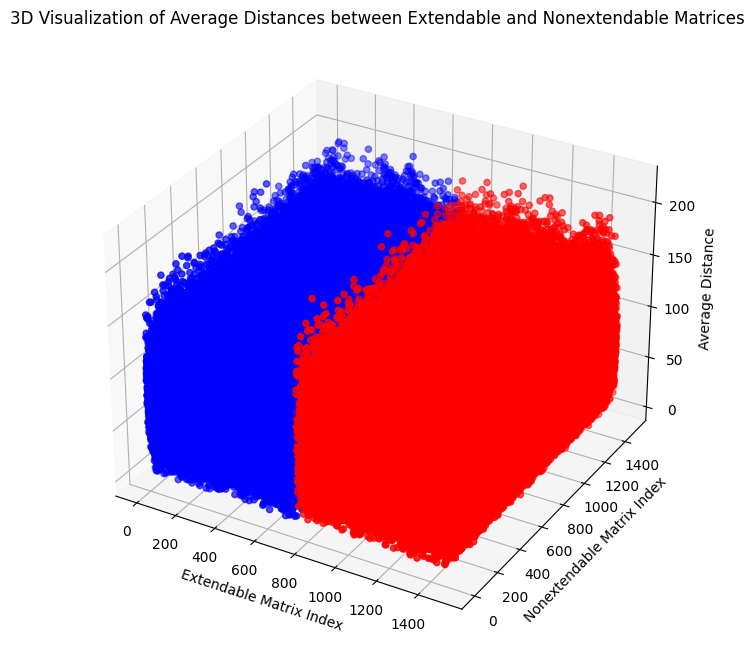

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(extendable_class[:1500], nonextendable_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances between Extendable and Nonextendable Matrices')

# Show plot
plt.show()


**CL & EX**

Average distances between extendables and nonextendables:

Mean average distance: 69.13627466946156
Max average distance: 948.0551144316453
Min average distance: 0.0



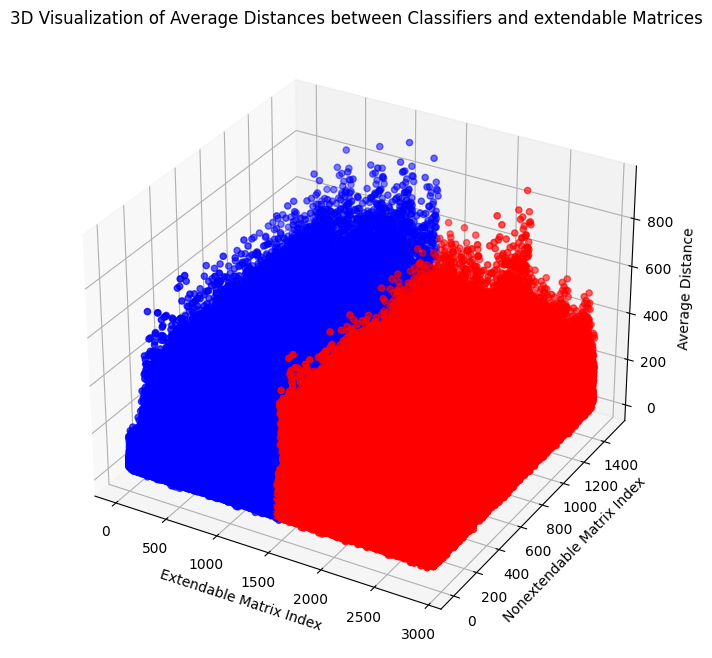

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(goodclassifier_class, extendable_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances between Classifiers and extendable Matrices')

# Show plot
plt.show()


**CL & NEX**

Average distances between extendables and nonextendables:

Mean average distance: 61.53630943012111
Max average distance: 950.3860399858576
Min average distance: 0.3535533905932738



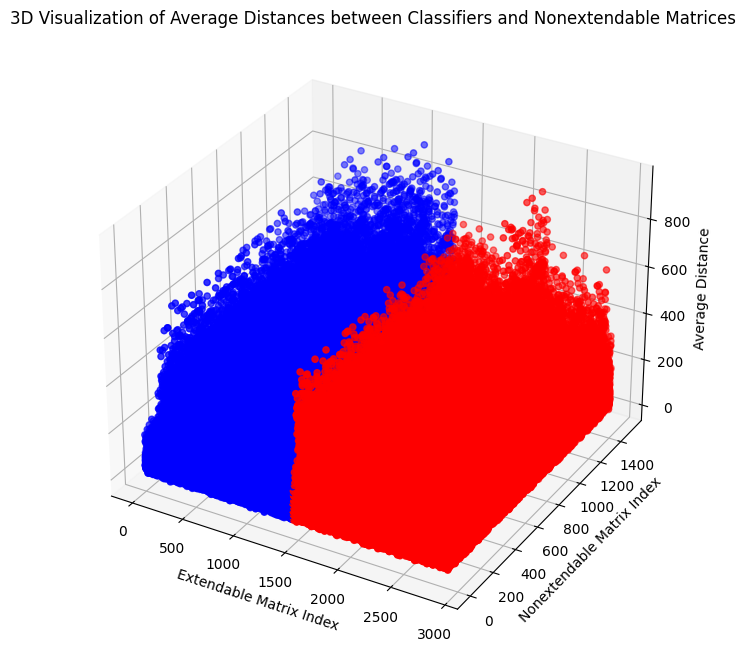

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(goodclassifier_class, nonextendable_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances between Classifiers and Nonextendable Matrices')

# Show plot
plt.show()


***Within themselves***

Average distances between extendables and nonextendables:

Mean average distance: 78.85636339819216
Max average distance: 246.2176374673431
Min average distance: 0.0



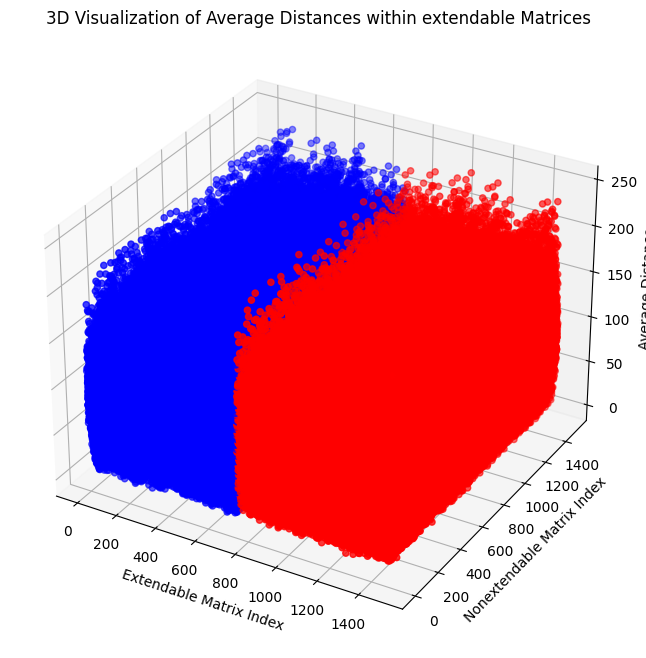

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(extendable_class[:1500], extendable_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances within extendable Matrices')

# Show plot
plt.show()


Average distances between extendables and nonextendables:

Mean average distance: 57.4054374609007
Max average distance: 200.83077453418338
Min average distance: 1.118033988749895



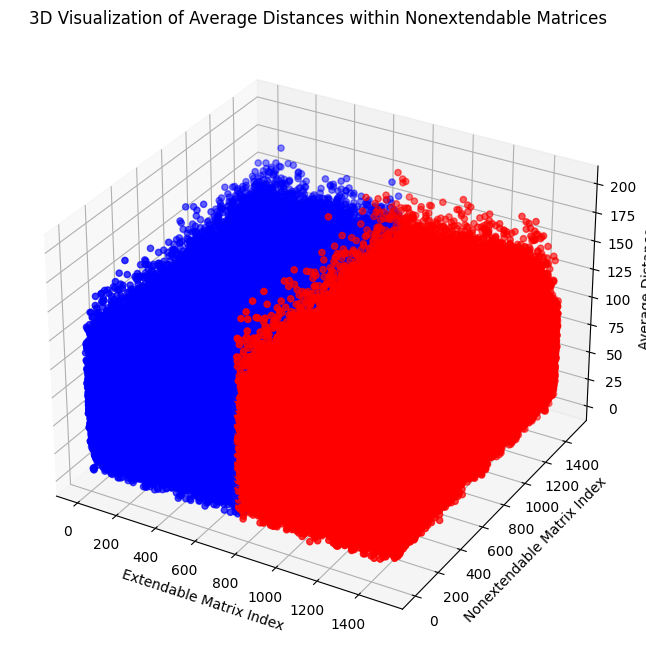

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(nonextendable_class[:1500], nonextendable_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances within Nonextendable Matrices')

# Show plot
plt.show()


Average distances between extendables and nonextendables:

Mean average distance: 67.93705704431251
Max average distance: 8348.398611410454
Min average distance: 0.0



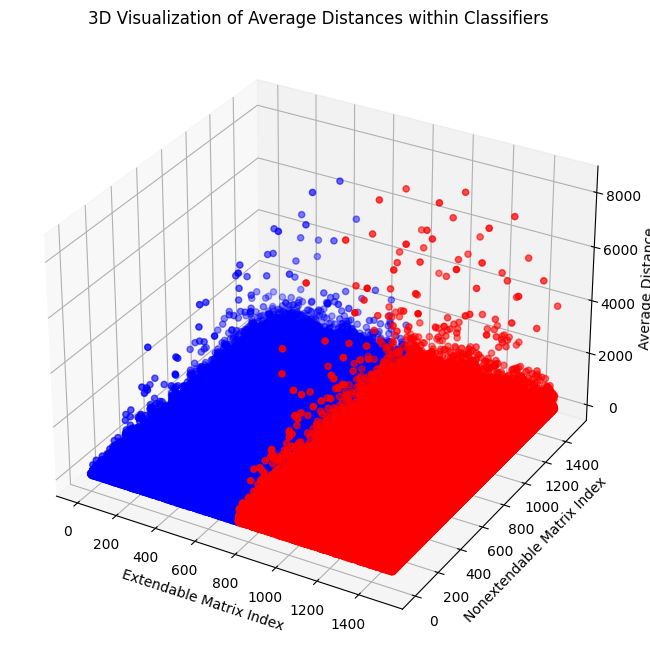

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize lists for average distances and positions
average_distances = []
positions = []  # Positions for plotting
colors = []  # Colors for differentiation

def calculate_average_distances_and_positions(matrices_e, matrices_n, average_distances, positions, colors):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            distances = []
            for row_n in matrices_n[j]:
                for row_e in matrices_e[i]:
                    dot_product = np.dot(row_n, row_e)
                    distances.append(dot_product)
            average_distance = np.sqrt(np.mean(np.square(distances)))
            average_distances.append(average_distance)
            positions.append((i, j, average_distance))  # Append positions for plotting
            colors.append('blue') if i < num_e / 2 else colors.append('red')

# Calculate average distances and positions
calculate_average_distances_and_positions(goodclassifier_class[:1500], goodclassifier_class[:1500], average_distances, positions, colors)

print("Average distances between extendables and nonextendables:\n")
print(f"Mean average distance: {np.mean(average_distances)}")
print(f"Max average distance: {np.max(average_distances)}")
print(f"Min average distance: {np.min(average_distances)}\n")

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
colors = np.array(colors)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot average distances as markers
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Extendable Matrix Index')
ax.set_ylabel('Nonextendable Matrix Index')
ax.set_zlabel('Average Distance')
ax.set_title('3D Visualization of Average Distances within Classifiers')

# Show plot
plt.show()


# Assumption Bin

positivity/negativity

In [ ]:
positive = 0
nonnegative = 0
positive1 = 0
nonnegative1 = 0
positive2 = 0
nonnegative2 = 0

# Function to check if all values in a matrix are positive
def all_positive_nested(matrix):
    for row in matrix:
        for value in row:
            if value <= 0:
                return False
    return True

def nonNeg_nested(matrix):
    for row in matrix:
        for value in row:
            if value < 0:
                return False
    return True

# Check each extendable
for idx, matrix in enumerate(extendable_class):
    if all_positive_nested(matrix):
        positive += 1
    if nonNeg_nested(matrix):
      nonnegative += 1

# Check each nonextendable
for idx, matrix in enumerate(nonextendable_class):
    if all_positive_nested(matrix):
        positive1 += 1
    if nonNeg_nested(matrix):
      nonnegative1 += 1

# Check each classifier
for idx, matrix in enumerate(goodclassifier_class):
    if all_positive_nested(matrix):
        positive2 += 1
    if nonNeg_nested(matrix):
      nonnegative2 += 1

print(f"Number of positive extendable matrices: {positive}")
print(f"Number of nonnegative extendable matrices: {nonnegative}\n")

print(f"Number of nonnegative nonextendable matrices: {nonnegative1}")
print(f"Number of nonnegative classifiers: {nonnegative2}")

Number of positive extendable matrices: 11452
Number of nonnegative extendable matrices: 28396

Number of nonnegative nonextendable matrices: 0
Number of nonnegative classifiers: 0


b > c

In [ ]:
def count_matrices_with_condition(matrices):
    count = 0
    for matrix in matrices:
        for row in matrix:
            if row[1] + row[2] > 0:
                count += 1
                break
    return count

count = count_matrices_with_condition(nonextendable_class)
print(f"Number of matrices with at least one row where row[1] + row[2] > 0: {count}")


Number of matrices with at least one row where row[1] + row[2] > 0: 22420


# delete later

cosine distance

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine

# Calculate cosine distances (squared cosine similarity) and angles
angle_scores_e = []  # Initialize lists for angle scores for extendables
angle_scores_n = []  # Initialize lists for angle scores for nonextendables
angles_e = []        # Initialize lists for actual angles for extendables
angles_n = []        # Initialize lists for actual angles for nonextendables

def calculate_cosine_distances_and_angles(matrices_e, matrices_n, angle_scores_e, angle_scores_n, angles_e, angles_n):
    num_e = len(matrices_e)
    num_n = len(matrices_n)

    for i in range(num_e):
        for j in range(num_n):
            cosine_similarity = 1 - cosine(matrices_e[i].flatten(), matrices_n[j].flatten())
            angle_scores_e.append(cosine_similarity ** 2)  # Append squared cosine similarity for extendables
            angle_scores_n.append(cosine_similarity ** 2)  # Append squared cosine similarity for nonextendables

            # Calculate actual angle in degrees
            angle_radians = np.arccos(cosine_similarity)
            angle_degrees = np.degrees(angle_radians)
            if not np.isnan(angle_degrees):  # Check for NaN values
                angles_e.append(angle_degrees)
                angles_n.append(angle_degrees)

# Calculate angles and cosine distances
calculate_cosine_distances_and_angles(extendable_class[:1000], nonextendable_class[:1000], angle_scores_e, angle_scores_n, angles_e, angles_n)

# Print results
print("Cosine distances (squared cosine similarity) and angles between extendables and nonextendables:\n")
print(f"Mean angle score: {np.mean(angle_scores_e)}")
print(f"Max angle score: {np.max(angle_scores_e)}")
print(f"Min angle score: {np.min(angle_scores_e)}\n")
print(f"Mean angle (degrees): {np.mean(angles_e)}")
print(f"Max angle (degrees): {np.max(angles_e)}")
print(f"Min angle (degrees): {np.min(angles_e)}")


Cosine distances (squared cosine similarity) and angles between extendables and nonextendables:

Mean angle score: 0.38973756175219787
Max angle score: 0.9864864864864865
Min angle score: 0.0

Mean angle (degrees): 52.051819474411936
Max angle (degrees): 107.51555040546332
Min angle (degrees): 6.675592166076725


<ipython-input-3-0bcb05c9bd41>:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_similarity)


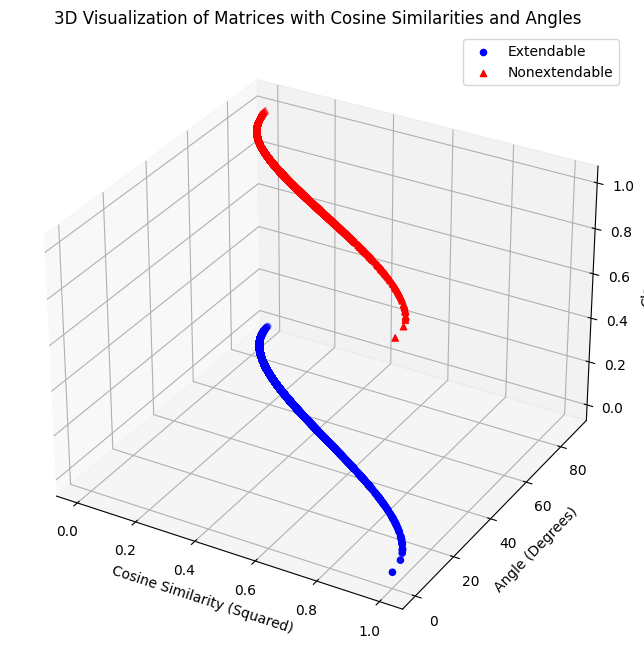

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate cosine similarity and angle in degrees
def calculate_cosine_similarity_and_angle(matrix1, matrix2):
    vec1 = matrix1.flatten()
    vec2 = matrix2.flatten()

    # Calculate cosine similarity (squared cosine similarity)
    cosine_similarity = 1 - np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    angle_score = cosine_similarity ** 2

    # Calculate angle in degrees
    angle_radians = np.arccos(cosine_similarity)
    angle_degrees = np.degrees(angle_radians)

    return angle_score, angle_degrees

# Prepare data for plotting
positions_e = []  # Positions for extendables
positions_n = []  # Positions for nonextendables
colors = []  # Colors for differentiation (optional)

# Iterate through matrices and calculate cosine similarities and angles
for matrix_e in extendable_class[:100]:
    for matrix_n in nonextendable_class[:100]:
        angle_score, angle_degrees = calculate_cosine_similarity_and_angle(matrix_e, matrix_n)

        # Append positions and colors
        positions_e.append((angle_score, angle_degrees, 0))  # Position for extendable
        positions_n.append((angle_score, angle_degrees, 1))  # Position for nonextendable
        colors.append('blue')  # Color for extendable
        colors.append('red')   # Color for nonextendable

# Convert lists to numpy arrays
positions_e = np.array(positions_e)
positions_n = np.array(positions_n)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot extendable matrices as blue markers
ax.scatter(positions_e[:, 0], positions_e[:, 1], positions_e[:, 2], c='blue', marker='o', label='Extendable')

# Plot nonextendable matrices as red markers
ax.scatter(positions_n[:, 0], positions_n[:, 1], positions_n[:, 2], c='red', marker='^', label='Nonextendable')

# Set labels and title
ax.set_xlabel('Cosine Similarity (Squared)')
ax.set_ylabel('Angle (Degrees)')
ax.set_zlabel('Class')
ax.set_title('3D Visualization of Matrices with Cosine Similarities and Angles')

# Add legend
ax.legend()

plt.show()


classifier verificatoin

In [ ]:
import numpy as np

GoodClassdictC = 0
failedAbsC = 0
failedFirC = 0

for matrix_index in range(len(goodclassifier_class)):  # Iterate over matrices
    matrix = goodclassifier_class[matrix_index]  # Get the matrix at the current index
    passes_all_conditions = True  # Flag to track if the matrix passes all conditions

    for j in range(4):  # Iterate over columns of the matrix
        col = matrix[:, j]

        # Check secondary condition
        diff1_sec = col[3] + col[2]
        diff2_sec = -1*col[1] - 1 * col[0]
        diff3_sec = -2 * col[0]
        if not (diff1_sec <= diff2_sec <= diff3_sec):
            #print(matrix, "Fails second condition in column:", j)
            failedFirC += 1
            passes_all_conditions = False
            break

        # Check absolute value condition
        diff1_abs = np.abs(col[3] - col[2])
        diff2_abs = np.abs(col[1] - col[0])
        if not (diff1_abs <= diff2_abs):
            #print(matrix, "Fails absolute condition in column:", j)
            failedAbsC += 1
            passes_all_conditions = False
            break

    if passes_all_conditions:
        #print(matrix, "Passes all conditions!!")  # Print the matrix if all columns satisfy the condition
        GoodClassdictC += 1

print(f"{GoodClassdictC} Classifiers passed all conditions")
print(f"{failedFirC} Classifiers failed the first condition")
print(f"{failedAbsC} Classifiers failed the absolute (second) condition")

11 Classifiers passed all conditions
2282 Classifiers failed the first condition
611 Classifiers failed the absolute (second) condition


In [ ]:
import numpy as np

def check_matrices(for60):
    conditions = [
        lambda row: (row[0] + row[1] + row[2] - row[3] <= 0),
        lambda row: (row[0] - row[1] + row[2] - row[3] >= 0),
        lambda row: (row[0] - row[1] - row[2] - row[3] >= 0),
        lambda row: (row[0] + 0 * -row[1] - row[2] + 0 * -row[3] <= 0),
        lambda row: (row[0] - row[1] + row[2] + row[3] <= 0),
        lambda row: (row[0] + row[1] == row[2] + row[3]),
        lambda row: (row[0] + row[1] >= row[2] + row[3]),
        lambda row: (row[0] + row[1] >= row[2] + row[3]),
        lambda row: (row[0] + row[1] >= row[2] + row[3])
    ]

    didntpass = [[] for _ in range(len(conditions))]
    passed1 = 0
    failed1 = 0

    for matrix in for60:
        for i, condition in enumerate(conditions):
            all_rows_satisfied = True
            for row in matrix:
                if not condition(row):
                    all_rows_satisfied = False
                    break

            if all_rows_satisfied:
                passed1 += 1
                break
            elif i == len(conditions) - 1:
                failed1 += 1
                didntpass[i].append(matrix)
            else:
                didntpass[i].append(matrix)

    didntpass = [np.array(didntpass[i]) for i in range(len(conditions))]

    print(f"{passed1} Classifiers passed one of the conditions condition")
    print(f"{failed1} Classifiers failed all conditions")

    return didntpass, passed1, failed1

# Usage example:
didntpass, passed1, failed1 = check_matrices(for60)

909 Classifiers passed one of the conditions condition
402 Classifiers failed all conditions
